# 3 Houses


In [1]:
import re
import operator
import math
import string
import nltk
import cPickle
import time
import scipy
import cPickle
import csv
import sys
import numpy as np
from scipy import sparse
from operator import add
from scipy import sparse
from pyspark.sql import SparkSession, Row
from collections import Counter
from pprint import pprint

from sklearn.decomposition import NMF, LatentDirichletAllocation
from pyspark.ml.linalg import Vectors, SparseVector
from pyspark.ml.clustering import LDA

from pyspark.ml.linalg import VectorUDT
from pyspark.sql.functions import udf

import matplotlib.pyplot as plt
%matplotlib inline

csv.field_size_limit(sys.maxsize)
#csv.field_size_limit(2000000000000)

131072

## (a)

In [2]:
spark  = SparkSession.builder.config("spark.driver.maxResultSize", "20g")\
.master('local[28]').appName('housing').getOrCreate()

In [3]:
df = spark.read.option("header","true").csv("/project/cmsc25025/zillow/zillow-train.csv")


In [4]:
rdd = df.rdd

In [5]:
feature_row = rdd.map(lambda x: [int(x[0]), float(x[1]),float(x[2]),float(x[3]), int(x[4]), float(x[5]), int(x[6])
                                , x[7], x[8], x[9], float(x[10]), float(x[11]),x[12],x[13],x[14],float(x[15])])

In [6]:
ID_list = rdd.map(lambda x: int(x[0])).collect()

In [123]:

Lat_list = rdd.map(lambda x: float(x[1])).collect()
Long_list = rdd.map(lambda x: float(x[2])).collect()
ListPrice_list = rdd.map(lambda x: float(x[3])).collect()
SaleYear_list = rdd.map(lambda x: float(x[4])).collect()
Bathroom_list = rdd.map(lambda x: float(x[5])).collect()
Bedroom_list = rdd.map(lambda x: float(x[6])).collect()


In [8]:
BuiltYear_list = rdd.map(lambda x: int(x[7]) if x[7] != 'NA' else 1820).collect()
BuildDecade_list = rdd.map(lambda x: int(x[8]) if x[8] != 'UNKNOWN' else 1820).collect()
MajorRenov_list = rdd.map(lambda x: int(x[9]) if x[9] != 'NONE' else x[9]).collect()



In [9]:
FinishSqFt_list = rdd.map(lambda x: float(x[10])).collect()
LotSqFt_list = rdd.map(lambda x: float(x[11])).collect()
MSA_list = rdd.map(lambda x: x[12]).collect()
City_list = rdd.map(lambda x: x[13]).collect()
HighSchool_list = rdd.map(lambda x: x[14]).collect()



In [5]:
SalePrice_list = rdd.map(lambda x: float(x[15])) #68956 row getting some error cant convert to float

In [16]:
SalePrice_list2 = rdd.map(lambda x: x[15]).collect()

In [6]:
#SalePrice_list2[:5]
SalePrice_list.take(68956)[68950:]

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 3.0 failed 1 times, most recent failure: Lost task 1.0 in stage 3.0 (TID 4, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/software/spark-2.1-el7-x86_64/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/software/spark-2.1-el7-x86_64/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/software/spark-2.1-el7-x86_64/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/software/spark-2.1-el7-x86_64/python/pyspark/rdd.py", line 1339, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-5-d8d2f8107467>", line 1, in <lambda>
TypeError: float() argument must be a string or a number

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1944)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1944)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1918)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1931)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1944)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/software/spark-2.1-el7-x86_64/python/lib/pyspark.zip/pyspark/worker.py", line 174, in main
    process()
  File "/software/spark-2.1-el7-x86_64/python/lib/pyspark.zip/pyspark/worker.py", line 169, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/software/spark-2.1-el7-x86_64/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/software/spark-2.1-el7-x86_64/python/pyspark/rdd.py", line 1339, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-5-d8d2f8107467>", line 1, in <lambda>
TypeError: float() argument must be a string or a number

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1944)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1944)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [31]:
test = [type(x) for x in SalePrice_list2]
test2 = [x for x in test if type(x) != unicode]


In [137]:
total_count = len(MajorRenov_list)
#SalePrice_list.take(68955)
print SalePrice_list2[68950:68960] #ranges 68952 - 
print float(u'286500') 
#SalePrice_list = [float(x) for x in SalePrice_list2]
# for i, string in enumerate(SalePrice_list2):
#     try: 
#         float(string)
#     except ValueError:
#         print "{} Not a float {}".format(i).format(string)
        
for i, string in enumerate(SalePrice_list2): 
  try:
    #float(string)
    isinstance(string, int)
  except ValueError:
    print "{} Not a float".format(string)
    print "{} index Not a float".format(i)

print(float('6.00E+05'))

[u'254000', u'145000', u'188000', u'219900', u'238500', u'224900', u'286500', u'160000', u'340000', u'469500']
286500.0
600000.0


In [5]:
with open("/project/cmsc25025/zillow/zillow-train.csv") as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    ID_list =[]
    Lat_list =[]
    Long_list =[]
    ListPrice_list =[]
    SaleYear_list =[]
    Bathroom_list =[]
    Bedroom_list =[]
    BuiltYear_list =[]
    BuildDecade_list =[]
    MajorRenov_list =[]
    FinishSqFt_list =[]
    LotSqFt_list =[]
    MSA_list =[]
    City_list =[]
    HighSchool_list =[]
    SalePrice_list =[]
    features_list = []
    cnt = 0
    for i,row in enumerate(readCSV):
        features_list.append(row)
        cnt+=1
#         if (i == 114839):
#             predictors = row;
#         if (i != 0):
#             ID_list.append(row[0])
#             Lat_list.append(float(row[1]))
#             Long_list.append(float(row[2]))
#             ListPrice_list.append(float(row[3]))
#             SaleYear_list.append(int(row[4]))
#             Bathroom_list.append(float(row[5]))
#             Bedroom_list.append(int(row[6]))
#             if (row[7] == 'NA'):
#                 BuiltYear_list.append(row[7])
#                 BuildDecade_list.append(row[8])
#             else:
#                 BuiltYear_list.append(int(row[7]))
#                 BuildDecade_list.append(int(row[8]))
#             if (row[9] == 'NONE'):
#                 MajorRenov_list.append(row[9])
#             else:
#                 MajorRenov_list.append(int(row[9]))
#             FinishSqFt_list.append(float(row[10]))
#             LotSqFt_list.append(float(row[11]))
#             MSA_list.append(row[12])
#             City_list.append(row[13])
#             HighSchool_list.append(row[14])
#             if (i != 114841):
#                 SalePrice_list.append(float(row[15]))
#             cnt += 1
            #if (i > 130000):
             #   break;
#SalePrice.list.append(float(row[]))

#114839 index matches to the 140597th row in the csv...

In [12]:
print cnt
print i
print ID_list[114830:114839]
#print SalePrice_list[0]
186181 - 114839
#predictors
features_list[100000]

114842
114841
[]


['20225150',
 '34.404633',
 '-118.543908',
 '375000',
 '2013',
 '2',
 '3',
 '1982',
 '1980',
 'NONE',
 '1128',
 '3746',
 'Los Angeles',
 'Santa Clarita',
 'William S. Hart High School',
 '376000']

In [35]:

print Lat_list[:5]
print Long_list[:5]
print ListPrice_list[:5]
print SaleYear_list[:5]
print Bathroom_list[:5]
print Bedroom_list[:5]
print BuiltYear_list[:5]
print BuildDecade_list[:5]
print MajorRenov_list[:5]
print FinishSqFt_list[:5]
print LotSqFt_list[:5]
print MSA_list[:5]
print City_list[:5]
print HighSchool_list[:5]
print SalePrice_list[:5]

[42.145705, 42.095414, 42.075145, 42.144515, 42.14649]
[-88.138659, -87.901133, -87.893951, -87.852718, -87.883406]
[99000.0, 339900.0, 375000.0, 250000.0, 319000.0]
[2012, 2014, 2015, 2014, 2014]
[2.0, 2.0, 3.0, 2.0, 2.0]
[2, 3, 4, 3, 3]
[1953, 1970, 1820, 1950, 1954]
[1950, 1970, 1820, 1950, 1950]
[u'NONE', 2013, u'NONE', u'NONE', u'NONE']
[1020.0, 1893.0, 2542.0, 1529.0, 1700.0]
[14344.0, 9240.0, 15472.04295, 15472.04295, 8559.0]
[u'Chicago', u'Chicago', u'Chicago', u'Chicago', u'Chicago']
[u'Barrington', u'Mount Prospect', u'Mount Prospect', u'Northbrook', u'Northbrook']
[u'Barrington High School', u'Wheeling High School', u'John Hersey High School', u'NONE', u'NONE']


TypeError: 'PipelinedRDD' object has no attribute '__getitem__'

<function matplotlib.pyplot.show>

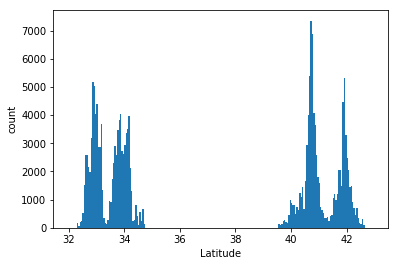

In [42]:
plt.hist(Lat_list, bins=np.arange(32,43,0.05))
plt.xlabel('Latitude')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

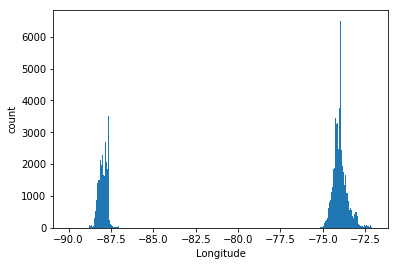

In [41]:
plt.hist(Long_list, bins=np.arange(-90,-72,0.05))
plt.xlabel('Longitude')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

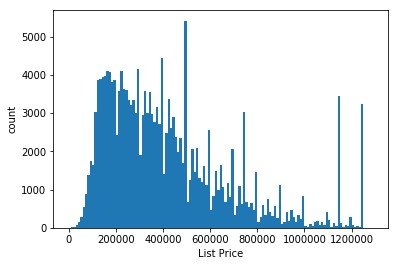

In [47]:
plt.hist(ListPrice_list, bins=np.arange(0,1300000,10000))
plt.xlabel('List Price')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

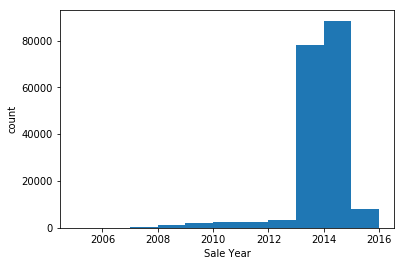

In [48]:
plt.hist(SaleYear_list, bins=np.arange(2005,2017,1))
plt.xlabel('Sale Year')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

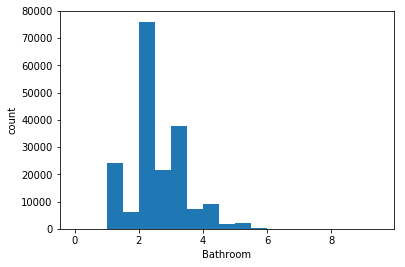

In [127]:
plt.hist(Bathroom_list, bins=np.arange(0,10,0.5))
plt.xlabel('Bathroom')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

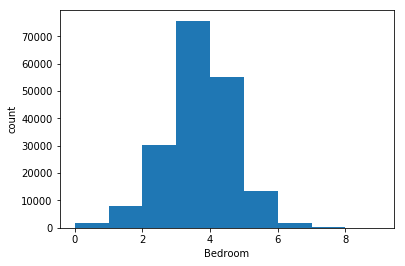

In [126]:
plt.hist(Bedroom_list, bins=np.arange(0,10,1))
plt.xlabel('Bedroom')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

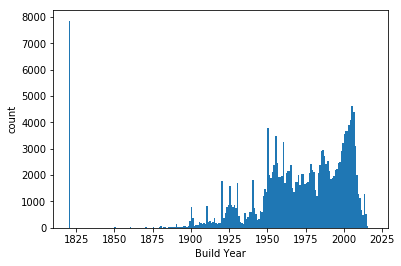

In [64]:
#BuiltYear_list = [x for x in BuiltYear_list if x != 'NA']
plt.hist(BuiltYear_list, bins=range(1820,2020,1))
plt.xlabel('Build Year')
plt.ylabel('count')
plt.show


I put all the "NA" as 1820 to show how many houses don't have a built year recorded

<function matplotlib.pyplot.show>

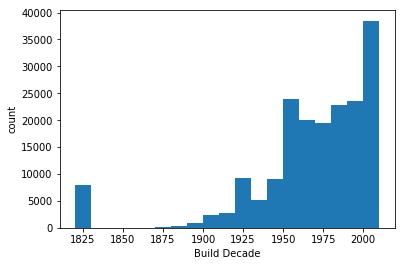

In [66]:
#BuildDecade_list = [x for x in BuildDecade_list if x != 'UNKNOWN']
plt.hist(BuildDecade_list, bins=np.arange(1820,2020,10))
plt.xlabel('Build Decade')
plt.ylabel('count')
plt.show

Like above, put all the "UNKNOWN" as 1820

 169320 number of houses that have not had a major renovation, which is 90.94% of the total


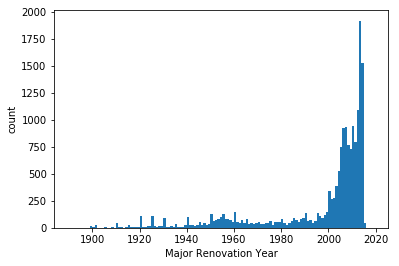

In [71]:
#MajorRenov_list = [x for x in MajorRenov_list if x != 'NONE']
just_years = [x for x in MajorRenov_list if x != 'NONE']
no_renovation_count = 186180 - len(just_years)
plt.hist(just_years, bins=np.arange(1890,2020,1))
plt.xlabel('Major Renovation Year')
plt.ylabel('count')
plt.show
print no_renovation_count, "number of houses that have not had a major renovation, which is {0:.2f}% of the total".format(no_renovation_count/1861.8)


<function matplotlib.pyplot.show>

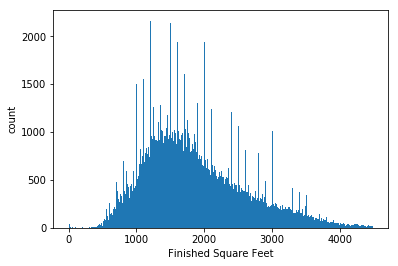

In [76]:
plt.hist(FinishSqFt_list, bins=np.arange(0,4500,10))
plt.xlabel('Finished Square Feet')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

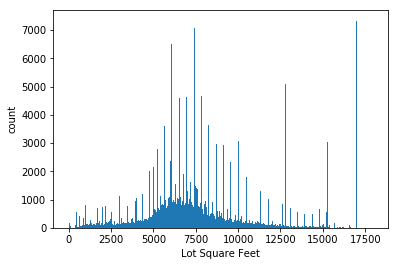

In [83]:
plt.hist(LotSqFt_list, bins=np.arange(0,18000,50))
plt.xlabel('Lot Square Feet')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

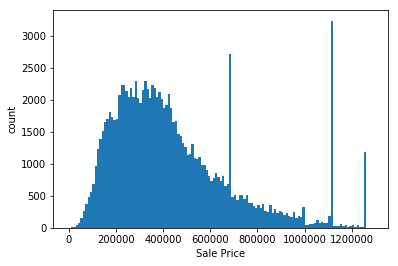

In [95]:
plt.hist(SalePrice_list, bins=np.arange(0,1300000,10000))
plt.xlabel('Sale Price')
plt.ylabel('count')
plt.show

In [41]:
MSA_c = Counter(MSA_list)
City_c = Counter(City_list)
HighSchool_c = Counter(HighSchool_list)

In [43]:
print MSA_c, 
print len(City_c)
print len(HighSchool_c)
print HighSchool_c['NONE']

Counter({u'New York City': 56626, u'Los Angeles': 48967, u'Dallas': 45265, u'Chicago': 35322})
1344
774
45199


MSA consists of 4 cities: NYC, LA, Dallas, and Chicago <br> 1344 unique cities <br> 774 unique High schools. Many houses don't have a HS nearby so we have 45,199 'NONE' values

ID, Lat, Long, ListPrice, SaleYear, Bathroom, Bedroom, BuiltYear,
BuildDecade, MajorRenov, FinishSqFt, LotSqFt, MSA, City, HighSchool,
SalePrice

Bag uncorrelated trees, then add them up, will give solution

a word is a feature

trees = high variance, low bias, <br>
stumps = low variance, high bias


In [35]:
greater = 0
for i in range(110000):
    if (ListPrice_list[i] > SalePrice_list[i]):
        greater += 1

print greater/1100.0

74.7554545455


<function matplotlib.pyplot.show>

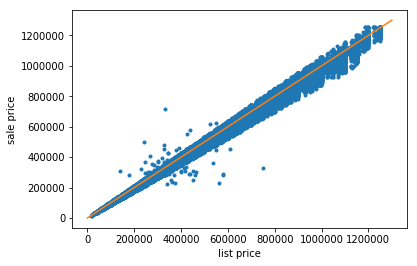

In [34]:
plt.plot(ListPrice_list,SalePrice_list, '.')
plt.plot([0, 1300000], [0, 1300000]) #y = x line
plt.xlabel('list price')
plt.ylabel('sale price')
plt.show

We can clearly see houses usually (74.75% of the time) sell for cheaper than their original list price

## (b)

In [34]:
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint

from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.util import MLUtils

In [84]:
numTrees = 5 #variance
maxDepth = 2 #bias
featureSubsetStrategy = 2 #total number of variables allowed in splits. 
                          #aimed at regulating the correlation between trees, by introducing randomness

def labeler(list_price,sale_price):
    diff = abs(list_price - sale_price) / list_price
    if (diff <= 0.05): # if sale price is within 5% of list price, then label it successful
        return 1.0
    else:
        return 0.0

def is_number(val):
    if val == 'NA' or 'UNKNOWN' or 'NONE':
        return 1800.0
    else:
        return float(val)

In [72]:
vocabulary_MSA = sorted(MSA_c)
vocabset_MSA = set(vocabulary_MSA)
vocabdict_MSA = {word:index for index, word in enumerate(vocabulary_MSA)}
vocabidict_MSA = {index:word for index, word in enumerate(vocabulary_MSA)}

In [62]:
vocabulary_City = sorted(City_c)
vocabset_City = set(vocabulary_City)
vocabdict_City = {word:index for index, word in enumerate(vocabulary_City)}
vocabidict_City = {index:word for index, word in enumerate(vocabulary_City)}

In [67]:
vocabulary_HS = sorted(HighSchool_c)
vocabset_HS = set(vocabulary_HS)
vocabdict_HS = {word:index for index, word in enumerate(vocabulary_HS)}
vocabidict_HS = {index:word for index, word in enumerate(vocabulary_HS)}

In [115]:
print len(vocabdict_MSA)
print vocabdict_City["Addison"]
print vocabidict_City[2.0]

4
1
Agoura Hills


In [131]:
#training data
feature_row_train = rdd.map(lambda x: LabeledPoint(labeler(float(x[3]),float(0)), 
                                            [float(x[0]), float(x[1]),float(x[2]),float(x[3]), float(x[4]), float(x[5]), 
                                           float(x[6]), is_number(x[7]), is_number(x[8]), is_number(x[9]), float(x[10]), float(x[11]), 
                                           float(vocabdict_MSA[x[12]]), float(vocabdict_City[x[13]]), float(vocabdict_HS[x[14]])]))

In [148]:


# Load and parse the data file into an RDD of LabeledPoint.
#data = MLUtils.loadLibSVMFile(spark.sparkContext, 'data/mllib/sample_libsvm_data.txt')
# Split the data into training and test sets (30% held out for testing)

(trainingData, testData) = feature_row_train.randomSplit([0.7, 0.3])
#(trainingData, testData) = data.randomSplit([0.7, 0.3])
# Train a RandomForest model.
# Empty categoricalFeaturesInfo indicates all features are continuous.
# Note: Use larger numTrees in practice.
# Setting featureSubsetStrategy=’’auto’’ lets the algorithm choose.
model = RandomForest.trainRegressor(trainingData,
    categoricalFeaturesInfo={},
    numTrees=3, featureSubsetStrategy="auto",
    impurity='variance', maxDepth=4, maxBins=32)
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = \
testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(\
lambda (v, p): (v - p) * (v - p)).sum() / float(testData.count())
print('Test Mean Squared Error = ' + str(testMSE))
print('Learned regression forest model:')
print(model.toDebugString())

Test Mean Squared Error = 0.0
Learned regression forest model:
TreeEnsembleModel regressor with 3 trees

  Tree 0:
    Predict: 0.0
  Tree 1:
    Predict: 0.0
  Tree 2:
    Predict: 0.0



## (c)

In [ ]:
#Get testing data
df_test = spark.read.option("header","true").csv("/project/cmsc25025/zillow/zillow-test.csv")
rdd_test = df_test.rdd

In [145]:
feature_row_test = rdd_test.map(lambda x: [float(x[0]), float(x[1]),float(x[2]),float(x[3]), float(x[4]), float(x[5]), 
                                           float(x[6]), is_number(x[7]), is_number(x[8]), is_number(x[9]), float(x[10]), float(x[11]), 
                                           float(vocabdict_MSA[x[12]]), float(vocabdict_City[x[13]]), float(vocabdict_HS[x[14]])])

feature_row_test2 = rdd_test.map(lambda x: [float(x[0]), float(x[1]),float(x[2]),float(x[3]), float(x[4]), float(x[5]), 
                                           float(x[6]), is_number(x[7]), is_number(x[8]), is_number(x[9]), float(x[10]), float(x[11]), 
                                            keyerr(x[13])])

feature_row_train2 = rdd.map(lambda x: LabeledPoint(labeler(float(x[3]),float(x[15])), 
                                            [float(x[0]), float(x[1]),float(x[2]),float(x[3]), float(x[4]), float(x[5]), 
                                           float(x[6]), is_number(x[7]), is_number(x[8]), is_number(x[9]), float(x[10]), float(x[11]), 
                                            keyerr(x[13])]))

In [141]:
def keyerr(key):
    if key in vocabdict_City.keys():
        return float(vocabdict_City[key])
    else:
        return 0.0;

In [146]:


trainingData = feature_row_train2 #Labeled Point and 0-14
testData = feature_row_test2 #this is already features from 0-14. Everything is float. Excludes saleprice

model = RandomForest.trainRegressor(trainingData,
    categoricalFeaturesInfo={},
    numTrees=3, featureSubsetStrategy="auto",
    impurity='variance', maxDepth=4, maxBins=32)
# Evaluate model on test instances and compute test error
predictions = model.predict(testData)

print('Learned regression forest model:')
print(model.toDebugString())

Learned regression forest model:
TreeEnsembleModel regressor with 3 trees

  Tree 0:
    Predict: 1.0
  Tree 1:
    Predict: 1.0
  Tree 2:
    Predict: 1.0



In [147]:
predictions.take(10)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [124]:
print feature_row_train.take(1)
feature_row_test.take(1)
sum = [x for x in Bathroom_list if x == 1.0]
len(sum)
Bedroom_list


[LabeledPoint(0.0, [3243035.0,42.145705,-88.138659,99000.0,2012.0,2.0,2.0,1800.0,1800.0,1800.0,1020.0,14344.0,0.0,53.0,34.0])]


[2.0,
 3.0,
 4.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 2.0,
 3.0,
 4.0,
 5.0,
 3.0,
 3.0,
 4.0,
 3.0,
 5.0,
 1.0,
 1.0,
 4.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 5.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 5.0,
 2.0,
 3.0,
 2.0,
 3.0,
 4.0,
 6.0,
 0.0,
 4.0,
 2.0,
 3.0,
 4.0,
 3.0,
 4.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 2.0,
 3.0,
 4.0,
 0.0,
 3.0,
 4.0,
 5.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 1.0,
 4.0,
 2.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 4.0,
 3.0,
 2.0,
 4.0,
 2.0,
 2.0,
 4.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 4.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 5.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 3.0,
 1.0,
 3.0,
 1.0,
 5.0,
 4.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 4.0,
 3.0,
 4.0,
 3.0,
 1.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 4.0,
 2.0,
 2.0,
 3.0,
 4.0,
 2.0,
 1.0,
 4.0